In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Single Layer Perceptron

In [2]:
class SingleLayerPerceptron:
    def __init__(self, input_size):
        self.input_size = input_size
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = 0.1
    def activation(self, x):
        return 1 if x > 0 else 0
    def predict(self, x):
        return self.activation(np.dot(self.weights, x) + self.bias)
    def train(self, x, y):
        y_pred = self.predict(x)
        error = y - y_pred
        self.weights += self.learning_rate * error * x
        self.bias += self.learning_rate * error
        return error
    def __str__(self):
        return f'weights: {self.weights}, bias: {self.bias}'

In [4]:
slp = SingleLayerPerceptron(2)
print(slp)

weights: [0.36725295 0.79055236], bias: 0.09761027843257808


In [12]:
input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

target = np.array([0, 1, 1, 0])


errors = []
for epoch in range(100):
    err = 0
    for x, y in zip(input, target):
        err += slp.train(x, y)
    errors.append(err)
    if err == 0:
        break

print(slp)
print(errors)


weights: [0.26725295 0.29055236], bias: -0.30238972156742194
[1, 1, 0]


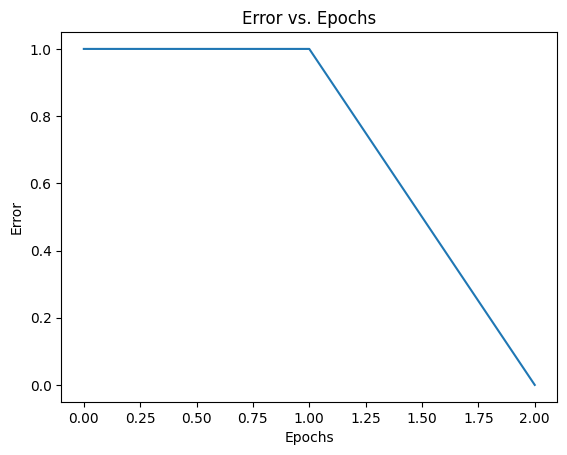

In [13]:
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()


# Multi Layer Perceptron

In [41]:
Here's the corrected code for your MultiLayerPerceptron class:

```python
import numpy as np

class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.random.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.random.rand(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        hidden_inputs = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_outputs = self.sigmoid(hidden_inputs)
        output_inputs = np.dot(hidden_outputs, self.weights_hidden_output) + self.bias_output
        output = self.sigmoid(output_inputs)
        return hidden_outputs, output
        
    def backward(self, inputs, hidden_outputs, output, target, learning_rate):
        output_error = target - output
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(hidden_outputs)

        self.weights_hidden_output += np.dot(hidden_outputs.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta) * learning_rate
        self.weights_input_hidden += np.dot(inputs.reshape(-1,1), hidden_delta.reshape(1,-1)) * learning_rate
        self.bias_hidden += np.sum(hidden_delta) * learning_rate


    def train(self, inputs, targets, learning_rate=0.1, epochs=100):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                hidden_outputs, output = self.forward(inputs[i])
                self.backward(inputs[i], hidden_outputs, output, targets[i], learning_rate)


In [52]:

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])
for i in range(len(inputs)):
    _, output = mlp.forward(inputs[i])
    print(f"Input: {inputs[i]}, Target: {targets[i]}, Prediction: {output}")

Input: [0 0], Target: [0], Prediction: [0.7695979]
Input: [0 1], Target: [1], Prediction: [0.79539793]
Input: [1 0], Target: [1], Prediction: [0.80124795]
Input: [1 1], Target: [0], Prediction: [0.82009198]
